In [2]:
import pretty_midi as pm
import numpy as np

# For plotting
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

# For putting audio in the notebook
import IPython.display

In [3]:
def plot_piano_roll(md, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(md.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pm.note_number_to_hz(start_pitch))

In [87]:
# Load MIDI file into PrettyMIDI object
# midi_data = pm.PrettyMIDI('Fur Elise.mid')
# midi_data = pm.PrettyMIDI('Rondo.mid')
midi_data = pm.PrettyMIDI('Moonlight Sonata.mid')
midi_data.instruments

[Instrument(program=0, is_drum=False, name="1st Mvmt Sonata No.14, Opus 27, No.2"),
 Instrument(program=0, is_drum=False, name="Sonata Quasi Una Fantasia (\"Moonlight\" Sonata)")]

In [88]:
# Print an empirical estimate of its global tempo
print("Estimated Tempo:", midi_data.estimate_tempo())

# Compute the relative amount of each semitone across the entire song, a proxy for key
total_velocity = sum(sum(midi_data.get_chroma()))
print([sum(semitone)/total_velocity for semitone in midi_data.get_chroma()])

print("Tempos:", midi_data.get_tempo_changes())

# Shift all notes up by 5 semitones
# for instrument in midi_data.instruments:
#     # Don't want to shift drum notes
#     if not instrument.is_drum:
#         for note in instrument.notes:
#             note.pitch += 5
# Synthesize the resulting MIDI data using sine waves
# audio_data = midi_data.synthesize()

Estimated Tempo: 149.058292114932
[0.08192922169447148, 0.2106962251088692, 0.019723037457219674, 0.07061386102579652, 0.11186815645268722, 0.013086517611350604, 0.09510364820597604, 0.025411827105538583, 0.19691633775536063, 0.07236963056585768, 0.008322845368913647, 0.09395869164795871]
Tempos: (array([  0.        ,  16.8       ,  17.22553167,  17.669976  ,
        19.37210267,  64.97210267,  65.39763433,  65.84207867,
        67.54420533,  87.94420533,  88.369737  ,  88.81418133,
        90.516308  , 101.316308  , 102.566308  , 103.870655  ,
       105.266003  , 105.74219333, 106.229998  , 106.729998  ,
       176.329998  , 176.75552967, 177.199974  , 178.90210067,
       184.50210067, 184.92763233, 185.37207667, 185.79760833,
       193.39760833, 194.64760833, 195.98094133, 197.48094133,
       199.05988833, 201.28211   , 201.71689233, 202.142424  ,
       202.55909067, 202.96725367, 278.56725367, 278.99278533,
       279.43722967, 279.86276133, 284.66276133, 285.088293  ,
       2

In [89]:
print([len(instrument.notes) for instrument in midi_data.instruments])
midi_data.remove_invalid_notes()
print([len(instrument.notes) for instrument in midi_data.instruments])

# minimum = 999
# maximum = -1
all_notes = []
for instrument in midi_data.instruments:
    notes = []
    for note in instrument.notes:
        notes.append(note.pitch)
    all_notes.append(notes)
#         if note.pitch > maximum: maximum = note.pitch

inst = midi_data.instruments[0]
print(inst)
print("*"*20)
for note in inst.notes[:9]:
    print("{note}: {start}->{end}".format(note=pm.note_number_to_name(note.pitch), 
                                          start=midi_data.time_to_tick(note.start), 
                                          end=midi_data.time_to_tick(note.end)))
    print(note)
    print("="*10)
#     n = note
print(len(all_notes))

[722, 423]
[722, 423]
Instrument(program=0, is_drum=False, name="1st Mvmt Sonata No.14, Opus 27, No.2")
********************
C#4: 128->256
Note(start=0.400000, end=0.800000, pitch=61, velocity=30)
E4: 256->384
Note(start=0.800000, end=1.200000, pitch=64, velocity=43)
C#4: 512->640
Note(start=1.600000, end=2.000000, pitch=61, velocity=29)
E4: 640->768
Note(start=2.000000, end=2.400000, pitch=64, velocity=32)
C#4: 896->1024
Note(start=2.800000, end=3.200000, pitch=61, velocity=25)
E4: 1024->1152
Note(start=3.200000, end=3.600000, pitch=64, velocity=25)
C#4: 1280->1408
Note(start=4.000000, end=4.400000, pitch=61, velocity=29)
E4: 1408->1536
Note(start=4.400000, end=4.800000, pitch=64, velocity=29)
C#4: 1664->1796
Note(start=5.200000, end=5.612500, pitch=61, velocity=27)
2


In [81]:
print(list(set(all_notes[0])))
print(list(set(all_notes[1])))
print("="*20)
# The track with the range that goes towards the highest notes is probably the melody (right hand)
# so we could take the highest max?
for idx, track in enumerate(all_notes):
    print("Track {idx} Min: {calc}".format(idx=idx, calc=min(track)))
    print("Track {idx} Max: {calc}".format(idx=idx, calc=max(track)))

[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 87]
[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
Track 0 Min: 57
Track 0 Max: 87
Track 1 Min: 29
Track 1 Max: 56


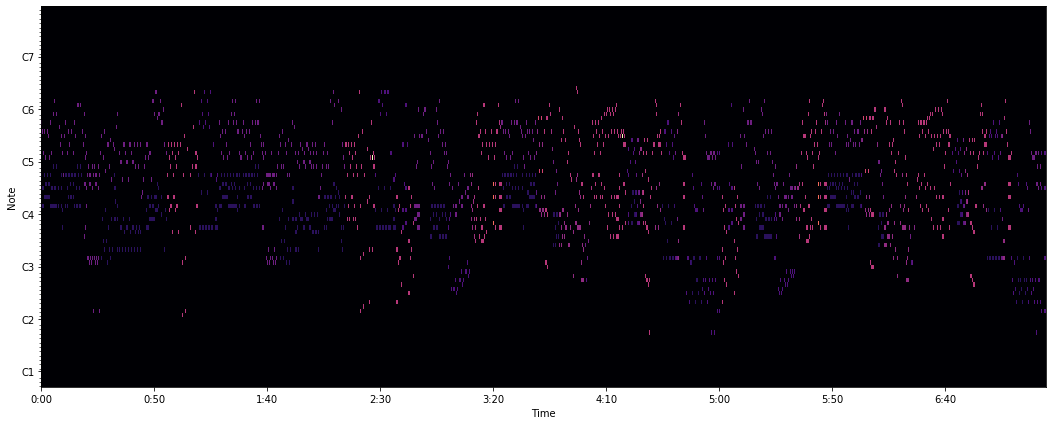

In [72]:
plt.figure(figsize=(18, 7))
plot_piano_roll(midi_data, 21, 108)

In [49]:
# Synthesis frequency
# sampling_rate = 16000
sampling_rate = 44100
IPython.display.Audio(midi_data.synthesize(fs=sampling_rate), rate=sampling_rate)

In [51]:
# midi_data.write('out.mid')

In [8]:
print('There are {} time signature changes'.format(len(midi_data.time_signature_changes)))
print('There are {} instruments'.format(len(midi_data.instruments)))
print('Instrument 0 ({inst}) has {} notes'.format(len(midi_data.instruments[0].notes), inst=midi_data.instruments[0].name))

There are 1 time signature changes
There are 4 instruments
Instrument 0 (Piano RH) has 611 notes


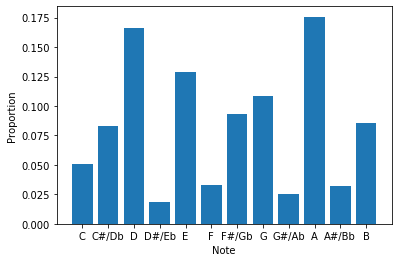

In [56]:
# Plot a pitch class distribution - sort of a proxy for key
plt.bar(np.arange(12), midi_data.get_pitch_class_histogram());
# plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xticks(np.arange(12), ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')
plt.show()

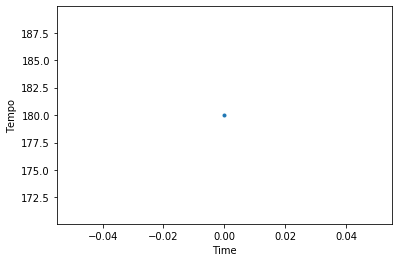

In [57]:
midi_data.get_onsets()
# Plot the tempo changes over time
# Many MIDI files won't have more than one tempo change event,
# but this particular file was transcribed to somewhat closely match the original song.
times, tempo_changes = midi_data.get_tempo_changes()
plt.plot(times, tempo_changes, '.')
plt.xlabel('Time')
plt.ylabel('Tempo')
plt.show()

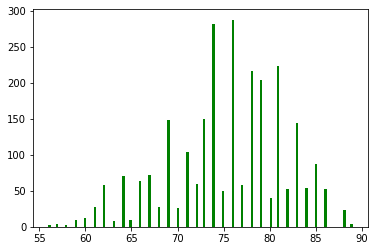

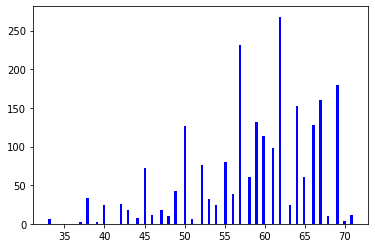

In [64]:
plt.figure()
plt.hist(all_notes[0], bins=128, color='green')
plt.show()
plt.figure()
plt.hist(all_notes[1], bins=128, color='blue')
plt.show()